In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import rdMolDescriptors, Descriptors
import pandas as pd
import matplotlib.pyplot as plt
# from faerun import Faerun
from tqdm.contrib.concurrent import process_map
import numpy as np
import pickle

from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

from mpl_toolkits.axes_grid1 import make_axes_locatable
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
from tqdm.notebook import tqdm
from rdkit.Chem.Draw import IPythonConsole

RDKit WARNING: [17:56:24] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D  

## for density plot

In [87]:
data = pd.read_csv("pmi_stereo_sp2_large.csv")

In [88]:
data = data[~data.pmi_x.isnull()]

In [93]:
np.max(ax.collections[0].get_array())

51.0

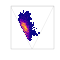

In [94]:
# ax.scatter(gdb_df.pmi_x,gdb_df.pmi_y)
cm = 1/2.54 
fig, ax = plt.subplots(figsize=(2*cm,2*cm))
# fig, ax = plt.subplots(figsize=(10,10))
# norm=mpl.colors.LogNorm()
h = ax.hist2d(data.pmi_x,data.pmi_y,bins=50,cmin=1,cmap="plasma")


triangle_thickness = 0.1
ax.set_xlim((0,1))
ax.set_ylim((0.5,1))
ax.plot([0,.5], [1,0.5],color='gray',linewidth=triangle_thickness)
ax.plot([.5,1], [0.5,1],color='gray',linewidth=triangle_thickness)
ax.plot([0,1], [1,1],color='gray',linewidth=triangle_thickness)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

[i.set_linewidth(0.1) for i in ax.spines.values()]
# print(ax.spines)

ax.set_xticks([])
ax.set_yticks([])
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="4%",pad=0.001)
# fig.colorbar(ax.collections[0],fraction=0.0235, pad=0.04)



# # 320 previous molecules
# ax.scatter(data_for2d_320.pmi_x, data_for2d_320.pmi_y,color=(62/255,188/255,155/255,0.5))

# # the 4 amides 
# ax.scatter(amide_data.pmi_x,amide_data.pmi_y,color="k")

# 
# plt.title("GDB, 4-8 atoms (19,603 structures)",fontsize=20)
# ax.grid(b=True, which='major', color='k', linestyle='--')
# plt.tight_layout()
fig.savefig('fig3_sp2_large.png', dpi=900)
# plt.close(fig)

In [22]:
len(data_for2d)

209047

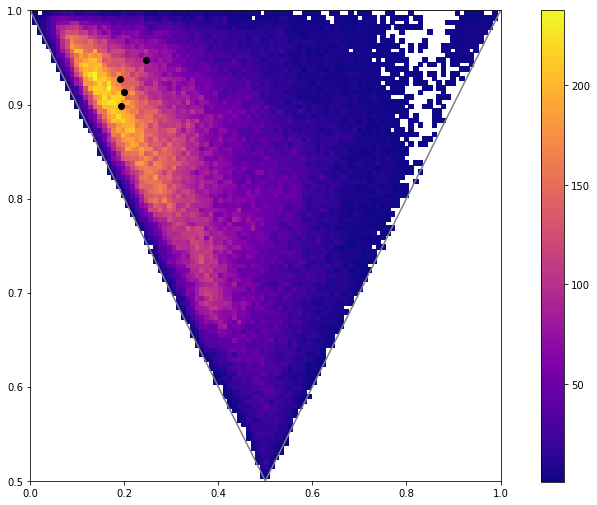

In [26]:
# import matplotlib.pyplot as plt
# do the amides overlay BUT plot the drugbank and GDB as separate density maps. 

fig, ax = plt.subplots(figsize=(18,18))
# fig, ax = plt.subplots(figsize=(10,10))
# norm=mpl.colors.LogNorm()
h = ax.hist2d(list(data_for2d.pmi_x), list(data_for2d.pmi_y),bins=100,cmin=1,cmap="plasma")


ax.set_xlim((0,1))
ax.set_ylim((0.5,1))
ax.plot([0,.5], [1,0.5],color='gray')
ax.plot([.5,1], [0.5,1],color='gray')
ax.plot([0,1], [1,1],color='gray')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="4%",pad=0.001)
fig.colorbar(h[3],fraction=0.0235, pad=0.04)

# # gdb 4-8 atoms
# ax.scatter(data_for2d.pmi_x, data_for2d.pmi_y,color=(70/255,49/255,126/255,1))

# # drugbank
# ax.scatter(data_in_db.pmi_x,data_in_db.pmi_y,alpha=1,color=(42/255,118/255,142/255,1))

# # 320 previous molecules
# ax.scatter(data_for2d_320.pmi_x, data_for2d_320.pmi_y,color=(46/255,179/255,124/255,1))

# # the 4 amides 
ax.scatter(amide_data.pmi_x,amide_data.pmi_y,color="k")



# ax.legend(["","","","All","In Drugbank","In 320","Amides"])
# plt.title("acid-amine enumeration (209,054 structures)",fontsize=20)
# ax.grid(b=True, which='major', color='k', linestyle='--')
fig.savefig('pmi_all200k_density.png', dpi=600)
# plt.close(fig)

In [24]:
data_for2d_320 = data_for2d[data_for2d.in_320]

In [27]:
amide_data

,smiles,min_dist_all,natoms,drugbank_matches,in_320,LogP,MW,HBD,HBA,PSA,ROTB,FSP3,SSSR,QED,pmi_x,pmi_y
77678,CCNC(=O)CC,2.0,7,1392,True,0.5325,101.149,1,1,29.1,2,0.8,0,0.539854,0.160738,0.933450
77851,C=CNC(=O)CC,2.0,7,98,True,0.6561,99.133,1,1,29.1,2,0.4,0,0.540898,0.262532,0.911491
93675,C=CC(=O)NCC,2.0,7,112,True,0.3085,99.133,1,1,29.1,2,0.4,0,0.495783,0.151834,0.944154
168824,C=CNC(=O)C=C,2.0,7,10,True,0.4321,97.117,1,1,29.1,2,0.0,0,0.497308,0.208890,0.854373


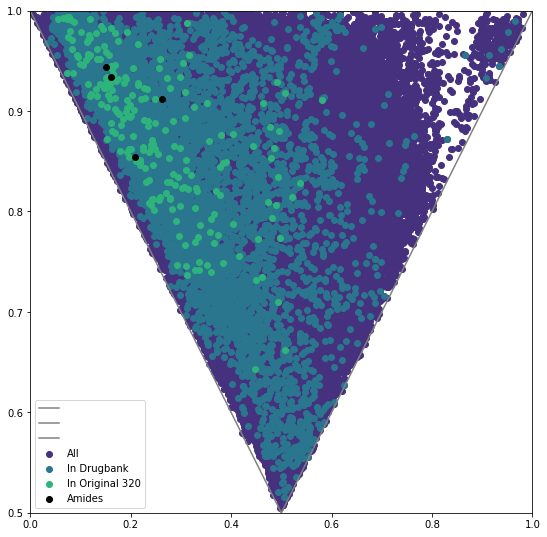

In [29]:
# import matplotlib.pyplot as plt
# do the amides overlay BUT plot the drugbank and GDB as separate density maps. 

fig, ax = plt.subplots(figsize=(18,18))
# fig, ax = plt.subplots(figsize=(10,10))
# norm=mpl.colors.LogNorm()
# h = ax.hist2d(list(data_for2d.pmi_x), list(data_for2d.pmi_y),bins=100,cmin=1,cmap="plasma")


ax.set_xlim((0,1))
ax.set_ylim((0.5,1))
ax.plot([0,.5], [1,0.5],color='gray')
ax.plot([.5,1], [0.5,1],color='gray')
ax.plot([0,1], [1,1],color='gray')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="4%",pad=0.001)
# fig.colorbar(h[3],fraction=0.0235, pad=0.04)


ax.scatter(data_for2d.pmi_x, data_for2d.pmi_y,color=(70/255,49/255,126/255,1))

# drugbank
ax.scatter(data_in_db.pmi_x,data_in_db.pmi_y,alpha=1,color=(42/255,118/255,142/255,1))

# 320 previous molecules
ax.scatter(data_for2d_320.pmi_x, data_for2d_320.pmi_y,color=(46/255,179/255,124/255,1))

# the 4 amides 
ax.scatter(amide_data.pmi_x,amide_data.pmi_y,color="k")



ax.legend(["","","","All","In Drugbank","In Original 320","Amides"])
# plt.title("acid-amine coupling space expansion",fontsize=20)
# ax.grid(b=True, which='major', color='k', linestyle='--')
fig.savefig('pmi_expansion.png', dpi=600)
# plt.close(fig)

In [ ]:
pc_data = pd.read_csv("./pubchem_neutral_CNO_data.csv",index_col=0)

In [ ]:
pc_data_plot = pc_data[np.isfinite(pc_data.pmi_x)]

In [ ]:
len(list(pc_data_plot.smiles))`

In [ ]:
len(set(list(pc_data_plot.smiles)))

In [ ]:
pc_data_plot

In [ ]:
# import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(18,18))
# fig, ax = plt.subplots(figsize=(10,10))
# norm=mpl.colors.LogNorm()
h = ax.hist2d(list(pc_data_plot.pmi_x), list(pc_data_plot.pmi_y),bins=100,cmin=1,cmap="plasma")


ax.set_xlim((0,1))
ax.set_ylim((0.5,1))
ax.plot([0,.5], [1,0.5],color='gray')
ax.plot([.5,1], [0.5,1],color='gray')
ax.plot([0,1], [1,1],color='gray')
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="4%",pad=0.001)
fig.colorbar(h[3],fraction=0.0235, pad=0.04)
plt.title("Pubchem, CNO only, 4-8 atoms (128,493 structures)",fontsize=20)
# ax.grid(b=True, which='major', color='k', linestyle='--')
# fig.savefig('test.png', dpi=600)
# plt.close(fig)

In [35]:
data_for2d.reset_index(drop=True,inplace=True)

In [38]:
data_for2d["db_capped"] = [min(i,100) for i in data_for2d.drugbank_matches]

In [44]:
data_for2d.sort_values("drugbank_matches",ascending=False,inplace=True)

In [45]:
data_for2d.reset_index(drop=True,inplace=True)

In [47]:
plot_data = data_for2d[data_for2d.drugbank_matches >0].copy()

In [49]:
plot_data.reset_index(drop=True,inplace=True)


In [50]:
plot_faerun(plot_data,"pmi_x","pmi_y",["db_capped"],"pmi_faerun")

/mnt/c/Users/Cernak/Desktop/qcr/8_atoms/acid_amine/pmi_faerun.html

In [30]:
def plot_faerun(df,x_plot,y_plot,props_toplot,out_filename):
# setup. change to taste
    f = Faerun(view="front", 
    #            clear_color = '#f5f5f5', 
               alpha_blending=True, 
               coords=False, scale = 1000.0)


    f.add_scatter(
        # No space in the string allowed for the name, use underscore!!
        # Cannot start with a number, it has to be a letter!!
        # My guess is that the string is to be converted to a variable name, 
        # therefore it has to be compatible with python/javascript variable naming scheme
        "Products",
        {
            "x": df[x_plot],
            "y": df[y_plot],
            "c": [df[p] for p in props_toplot],
            "labels": df['smiles'],  # Specify the label used for toggle window here
        },
        shader="smoothCircle",
        point_scale=3,
        max_point_size=20,
        categorical=[False]* len(props_toplot),
        colormap=["plasma"]*len(props_toplot),

        series_title=props_toplot,
        has_legend=True, # Show the legend on the lower right corner
        legend_labels=[None]*len(props_toplot)
    )


    f.plot(file_name = out_filename, # name of the .html file
           path = './',
           template = "smiles" # Choose template from "default", "reaction_smiles", "smiles", "url_image"
          )